# 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/2023 산대특/data/'

- 데이터 불러오기

In [ ]:
google = pd.read_csv(DATA_PATH + 'google.csv')
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


## 날짜 데이터 타입 배우기

In [ ]:
import pandas as pd
from datetime import datetime
time_stamp = pd.Timestamp(datetime(2023, 3,20))

print(type(time_stamp))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
pd.Timestamp('2023-03-20')

Timestamp('2023-03-20 00:00:00')

- 몇가지 옵션 확인

In [ ]:
# 연도추출
time_stamp.year

2023

In [ ]:
time_stamp.month

3

In [ ]:
time_stamp.day

20

In [ ]:
time_stamp.dayofweek

0

In [ ]:
# 요일 구하세요
time_stamp.day_name()

'Monday'

## pd.Period
- https://pandas.pydata.org/docs/reference/api/pandas.Period.html

In [ ]:
tmp_period = pd.Period('2023-03')
tmp_period

Period('2023-03', 'M')

In [ ]:
# 캘린더 데이
# 비즈니스 데이
tmp_period.asfreq('D')


Period('2023-03-31', 'D')

In [ ]:
tmp_period.to_timestamp().to_period('M')

Period('2023-03', 'M')

In [ ]:
index = pd.date_range(start = '2023-01-01', periods = 12, freq='M')
index

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
# 데이터프레임으로 변환
result = pd.DataFrame({'date' : index})
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


- 시계열 데이터 생성


In [ ]:
import numpy as np
data = np.random.random(size=(12,2))
data

array([[0.63235381, 0.33138392],
       [0.65626533, 0.05946639],
       [0.2311819 , 0.08182265],
       [0.73240801, 0.36314879],
       [0.55685692, 0.44108069],
       [0.03724058, 0.27300659],
       [0.41394443, 0.8616565 ],
       [0.15232128, 0.77885563],
       [0.28350872, 0.4203005 ],
       [0.73353403, 0.55809821],
       [0.70676158, 0.06890554],
       [0.07732073, 0.96506609]])

In [ ]:
# 데이터프레임으로 변환
result = pd.DataFrame(data = data, index=index)
result.head()

,0,1
2023-01-31,0.632354,0.331384
2023-02-28,0.656265,0.059466
2023-03-31,0.231182,0.081823
2023-04-30,0.732408,0.363149
2023-05-31,0.556857,0.441081


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2023-01-31 to 2023-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [ ]:
# 반복문 문제

day_7 = pd.date_range('2023-3-1', periods = 7)
day_7

# 반복문을 활용해서 dayofweek, day_name()을 활용해서
# 리스트로 변환할 필요 없음
# 예시 출력
# 0 Monday
# 1 Tuesday

for day in day_7:
  print(day.dayofweek, day.day_name())

2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday
0 Monday
1 Tuesday


In [ ]:
google = pd.read_csv(DATA_PATH + 'google.csv')
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


- 날짜 데이터 객체로 변환하면 , year, month 등등 편안하게 사용 가능함
- object를 날짜 데이터 객체로 변환

In [ ]:
google['Date'] = pd.to_datetime(google['Date'])
google['Date']

0      2014-01-02
1      2014-01-03
2      2014-01-04
3      2014-01-05
4      2014-01-06
          ...    
1089   2016-12-26
1090   2016-12-27
1091   2016-12-28
1092   2016-12-29
1093   2016-12-30
Name: Date, Length: 1094, dtype: datetime64[ns]

In [ ]:
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [ ]:
google2 = google.copy()
google2 = google.set_index('Date')
google2.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [ ]:
google2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


<Axes: title={'center': 'Stock Price'}, xlabel='Date'>

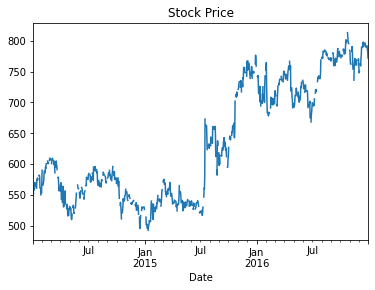

In [ ]:
google2['Close'].plot(title = 'Stock Price')

In [ ]:
google2.loc['2015'].head()

,Close
Date,
2015-01-01,NaN
2015-01-02,524.81
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,513.87


In [ ]:
#2015-3 ~2015-8
google2.loc['2015-3':'2015-08'].head()

,Close
Date,
2015-03-01,NaN
2015-03-02,571.34
2015-03-03,573.64
2015-03-04,573.37
2015-03-05,575.33


- 특정한 날짜 종가 구하기

In [ ]:
google2.loc['2016-6-1', 'Close']

734.15

In [ ]:
# 캘린더 데이, 비즈니스 데이
google2.asfreq('D').head() #캘린더 데이

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [ ]:
google2.asfreq('B').head() #비즈니스 데이

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [ ]:
yahoo = pd.read_csv(DATA_PATH + 'yahoo.csv')
yahoo['date'] = pd.to_datetime(yahoo['date'])
yahoo = yahoo.set_index('date')
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [ ]:
yahoo.tail()

,price
date,
2015-12-25,NaN
2015-12-28,33.60
2015-12-29,34.04
2015-12-30,33.37
2015-12-31,33.26


In [ ]:
result1 = yahoo.loc['2013',['price']].reset_index(drop=True)
result1 = result1.rename(columns = {'price' : '2013'})

result2 = yahoo.loc['2014',['price']].reset_index(drop=True)
result2 = result1.rename(columns = {'price' : '2014'})

result3 = yahoo.loc['2015',['price']].reset_index(drop=True)
result3 = result1.rename(columns = {'price' : '2015'})

final_result = pd.concat([result1, result2, result3], axis = 1)
final_result

,2013,2013,2013
0,20.08,20.08,20.08
1,19.78,19.78,19.78
2,19.86,19.86,19.86
3,19.40,19.40,19.40
4,19.66,19.66,19.66
...,...,...,...
255,NaN,NaN,NaN
256,40.65,40.65,40.65
257,40.49,40.49,40.49
258,40.20,40.20,40.20


In [ ]:
results = []
for year in ['2013', '2014', '2015']:
    result = yahoo.loc[year, ['price']].reset_index(drop=True)
    result = result.rename(columns={'price': year})
    results.append(result) 

final_result = pd.concat(results, axis=1)

print(final_result)

      2013   2014   2015
0    20.08    NaN    NaN
1    19.78  39.59  50.17
2    19.86  40.12  49.13
3    19.40  39.93  49.21
4    19.66  40.92  48.59
..     ...    ...    ...
256  40.65    NaN    NaN
257  40.49  50.86  33.60
258  40.20  50.53  34.04
259  40.44  51.22  33.37
260    NaN  50.51  33.26

[261 rows x 3 columns]


In [ ]:
years = range(2013, 2016)
results = []
for year in years:
    year = str(year)
    result = yahoo.loc[year, ['price']].reset_index(drop=True)
    result = result.rename(columns={'price': year})
    results.append(result)
final_result = pd.concat(results, axis=1)

print(final_result)

      2013   2014   2015
0    20.08    NaN    NaN
1    19.78  39.59  50.17
2    19.86  40.12  49.13
3    19.40  39.93  49.21
4    19.66  40.92  48.59
..     ...    ...    ...
256  40.65    NaN    NaN
257  40.49  50.86  33.60
258  40.20  50.53  34.04
259  40.44  51.22  33.37
260    NaN  50.51  33.26

[261 rows x 3 columns]


In [ ]:
years = ['2013', '2014', '2015']
datas = pd.DataFrame()
for year in years:
    result1 = yahoo.loc[year, ['price']].reset_index(drop=True)
    result1 = result1.rename(columns={'price': year})
    # 저장한 후 업데이트
    datas = pd.concat([datas, result1], axis =1)

datas

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59
...,...,...,...
256,40.65,NaN,NaN
257,40.49,50.86,33.60
258,40.20,50.53,34.04
259,40.44,51.22,33.37


In [ ]:
import pandas as pd

years = ['2013', '2014', '2015']
final_result = pd.concat([yahoo.loc[year, ['price']].reset_index(drop=True).rename(columns={'price': year}) for year in years], axis=1)

final_result

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59
...,...,...,...
256,40.65,NaN,NaN
257,40.49,50.86,33.60
258,40.20,50.53,34.04
259,40.44,51.22,33.37


## Matplotlib 설치
- 버전업을 해주세요

In [ ]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- 런타임 재시작

In [ ]:
import matplotlib as mpl
print(mpl.__version__)

3.7.1


In [ ]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

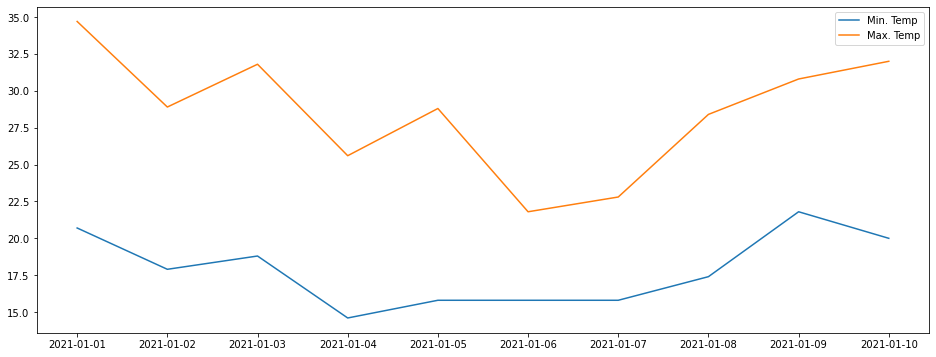

In [ ]:
# 여기부터 시작
import matplotlib.pyplot as plt

fig, ax =plt.subplots(figsize=(16,6))
# 내부 시각화 코드 디테일하게 작성

ax.plot(dates, min_temperature, label = 'Min. Temp') # 라인 그래프
ax.plot(dates, max_temperature, label = 'Max. Temp') # 라인 그래프
ax.legend() # 범례
plt.show()

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
data = yf.download("AAPL" , start="2021-10-01" , end="2023-03-17")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,141.899994,142.919998,139.110001,142.649994,141.404266,94639600
2021-10-04,141.759995,142.210007,138.270004,139.139999,137.924942,98322000
2021-10-05,139.490005,142.240005,139.360001,141.110001,139.877731,80861100
2021-10-06,139.470001,142.149994,138.369995,142.000000,140.759964,83221100
2021-10-07,143.059998,144.220001,142.720001,143.289993,142.038681,61732700


In [ ]:
import yfinance as yf
data2 = yf.download("TSLA" , start="2021-10-01" , end="2023-03-17")
data2.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400
2021-10-07,261.820007,268.333344,261.126678,264.536682,264.536682,57587400


In [ ]:
tsla_close = data2['Close']
tsla_close.head()

Date
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
2021-10-06    260.916656
2021-10-07    264.536682
Name: Close, dtype: float64

In [ ]:
appl_close = data['Close']
appl_close.head()

Date
2021-10-01    142.649994
2021-10-04    139.139999
2021-10-05    141.110001
2021-10-06    142.000000
2021-10-07    143.289993
Name: Close, dtype: float64

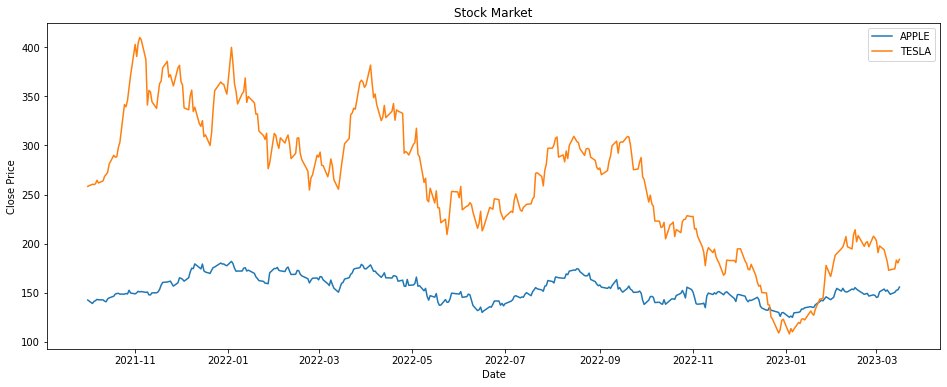

In [ ]:
# 라인 그래프 작성 시작
fig, ax =plt.subplots(figsize=(16,6))
# 내부 시각화 코드 디테일하게 작성
ax.plot(appl_close, label='APPLE')
ax.plot(tsla_close, label='TESLA') # 라인 그래프
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('Stock Market')
plt.savefig("apple & tesla") # 그래프 png 로 따로 저장
plt.show()

https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

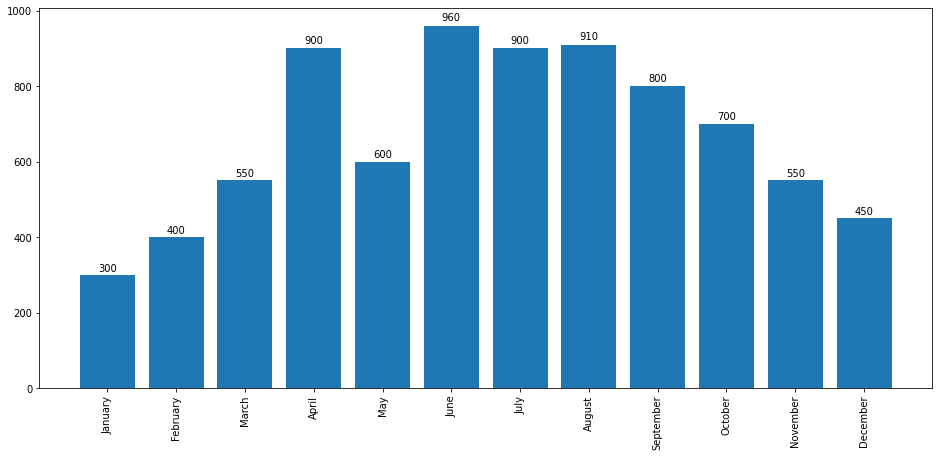

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

# 막대 그래프
fig, ax = plt.subplots(figsize=(16,7))
barplots = ax.bar(month_list, sold_list)
for rect in barplots:
  # print(type(rect))
  height = rect.get_height()
  # print(height)
  ax.text(rect.get_x() + rect.get_width() / 2, 1.01*height, height, ha= 'center', va ='bottom' )

plt.xticks(month_list, calendar.month_name[1:13], rotation=90)
plt.show()

## 히스토그램 & 수직 그래프

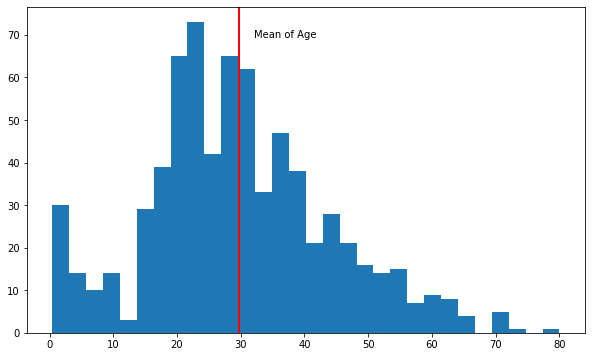

In [ ]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

# 데이터 불러오기
titanic = sns.load_dataset('titanic')
#데이터 가공
age = titanic['age']  
#데이터 시각화
fig, ax = plt.subplots(figsize=(10,6))
#메인 시각화 작성
ax.hist(age, bins=30)
#세부 그래프를 추가
ax.axvline(x = age.mean(), linewidth=2, color='r')
ax.text(37, 70, 'Mean of Age', horizontalalignment='center', verticalalignment='center')
plt.show()
